In [27]:
#Step 0. 필요한 모듈과 라이브러리를 로딩합니다.
import sys # 시스템
import os  # 시스템

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리

import chromedriver_autoinstaller
import selenium
from selenium.webdriver.common.by import By
from selenium import webdriver   # 웹 브라우저 자동화
import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
from tqdm import tqdm   # for문 돌릴 때 진행상황을 %게이지로 알려준다.
from datetime import datetime

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 크롬 드라이버 : 파이썬이 크롬 브라우저를 통제할 수 있게 도와주는 프로그램
# 크롬 드라이버를 '현재 작업 폴더'에 설치
chromedriver_autoinstaller.install(cwd=True)
driver = webdriver.Chrome()   # driver : 크롬 브라우저
# driver : 크롬 브라우저

driver.get('https://brand.naver.com/momshanwoo/products/2700977057?NaPm=ct%3Dml93cgm0%7Cci%3D943893680c37e635b7996a1ca5361d994be40990%7Ctr%3Dslsl%7Csn%3D655694%7Chk%3Df76436d24831d50f840de2404fb11add309621fc&nl-au=acc6d9abb39d44839a94df011f701966&nl-query=%ED%95%9C%EC%9A%B0%EC%84%A0%EB%AC%BC%EC%84%B8%ED%8A%B8#REVIEW')
time.sleep(2)    # 2초간 정지 

# 첫번째 리뷰 수집

In [16]:
# 별점
selector = ".n6zq2yy0KA"
driver.find_element(By.CSS_SELECTOR, selector).text

'5'

In [17]:
# 포장/상품
selector = ".b_caIle8kC"
driver.find_element(By.CSS_SELECTOR, selector).text

'출발 날짜 선택: 평일 오후 15시 이전 주문시 당일 발송 / 포장선택: 고급선물포장 (프리미엄패키지+보냉가방) / 1++등급 한우 명작세트 선택: 천하명작\n구매자거주인원1인싱글맛 만족도평범해요신선함적당해요포장적당해요'

In [12]:
# 후기 텍스트
selector = ".KqJ8Qqw082 > .MX91DFZo2F"
driver.find_element(By.CSS_SELECTOR, selector).text

'맛있습니다. 선물용으로 드렸는데 좋아하시네요'

In [14]:
# 구매 정보 '더보기' 클릭
driver.find_element(By.CSS_SELECTOR, ".G26iM0SmES").click( )
time.sleep(1)

In [11]:
# 후기 텍스트 '더보기' 클릭
driver.find_element(By.CSS_SELECTOR, ".DpXj3MxW8W").click( )
time.sleep(1)

In [15]:
# 다음 페이지로 이동 클릭
selector = ".hyY6CXtbcn._nlog_click"
driver.find_element(By.CSS_SELECTOR, selector).click()

In [16]:
page_buttons = driver.find_elements(By.CSS_SELECTOR, ".hyY6CXtbcn._nlog_click")

In [17]:
for i in range(len(page_buttons)):
    # 매번 버튼 리스트를 새로 갱신해주는 것이 에러 방지에 좋습니다 (페이지 이동 시 요소가 만료될 수 있음)
    buttons = driver.find_elements(By.CSS_SELECTOR, ".hyY6CXtbcn._nlog_click")
    
    print(f"{i + 11}페이지로 이동 중...")
    buttons[i].click()
    
    # 페이지 로딩 대기
    time.sleep(2)

11페이지로 이동 중...
12페이지로 이동 중...
13페이지로 이동 중...
14페이지로 이동 중...
15페이지로 이동 중...
16페이지로 이동 중...
17페이지로 이동 중...
18페이지로 이동 중...
19페이지로 이동 중...
20페이지로 이동 중...


In [24]:
box = driver.find_elements(By.CSS_SELECTOR, ".PxsZltB5tV._nlog_click._nlog_impression_element")
len(box)

20

In [20]:
review_list = []

box = driver.find_elements(By.CSS_SELECTOR, ".PxsZltB5tV._nlog_click._nlog_impression_element")

for item in box:
    try:
        selector = ".n6zq2yy0KA"
        review_data = item.find_element(By.CSS_SELECTOR, selector).text
        review_list.append(review_data)

    except Exception as e:
        print("리뷰 하나를 건너뜁니다.")
        continue    
    
print(len(review_list))
print(review_list)

20
['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '3', '3', '3', '4']


# 11~20p 리뷰 수집

In [24]:
star_all = []
packaging_product_all = []
review_all = []

# 1. 페이지 이동 (11~20)
for p in range(0, 10): 
    print(f"\n--- {p + 11}페이지 크롤링 START ---")
    
    # 페이지 버튼 찾기
    page_buttons = driver.find_elements(By.CSS_SELECTOR, ".hyY6CXtbcn._nlog_click")
    page_buttons[p].click()
    time.sleep(2) 

    # 한 페이지 내의 리뷰들(20개) 모두 찾기
    box = driver.find_elements(By.CSS_SELECTOR, ".PxsZltB5tV._nlog_click._nlog_impression_element")
    
# 각 리뷰(20개)를 하나씩 돌며 데이터 추출
    for item in box:
        try:
            # '포장/상품' 더보기 클릭
            try:
                item.find_element(By.CSS_SELECTOR, ".G26iM0SmES").click()
                time.sleep(0.3) 
            except:
                pass 

            # '후기 텍스트' 더보기 클릭
            try:
                item.find_element(By.CSS_SELECTOR, ".DpXj3MxW8W").click()
                time.sleep(0.3) 
            except:
                pass 

            # 데이터 추출 
            star = item.find_element(By.CSS_SELECTOR, ".n6zq2yy0KA").text
            packaging_product = item.find_element(By.CSS_SELECTOR, ".b_caIle8kC").text
            review = item.find_element(By.CSS_SELECTOR, ".KqJ8Qqw082 > .MX91DFZo2F").text

            # 리스트에 추가
            star_all.append(star)
            packaging_product_all.append(packaging_product)
            review_all.append(review)
            
        except: 
            print("리뷰 하나를 건너뜁니다.")
            continue

data_dict = {
    '별점': star_all,
    '포장/상품': packaging_product_all,
    '후기': review_all
}

print(f"총 {len(review_all)}개의 리뷰 수집 완료!")


--- 11페이지 크롤링 START ---

--- 12페이지 크롤링 START ---

--- 13페이지 크롤링 START ---

--- 14페이지 크롤링 START ---

--- 15페이지 크롤링 START ---

--- 16페이지 크롤링 START ---

--- 17페이지 크롤링 START ---

--- 18페이지 크롤링 START ---

--- 19페이지 크롤링 START ---

--- 20페이지 크롤링 START ---
총 200개의 리뷰 수집 완료!


In [25]:
df_1120 = pd.DataFrame.from_dict(data_dict)
df_1120

,별점,포장/상품,후기
0,5,출발 날짜 선택: 01월 29일(목)출발 예약 / 포장선택: 기본포장 (아이스박스+...,설 선물로 거래처분들께 보냈는데. 만족합니다.\n보내는 사람 변경도 여러건 부탁드렸...
1,5,출발 날짜 선택: 평일 오후 15시 이전 주문시 당일 발송 / 포장선택: 기본포장 ...,설 선물로 거래처분들께 보냈는데. 만족합니다.\n보내는 사람 변경도 여러건 부탁드렸...
2,5,출발 날짜 선택: 평일 오후 15시 이전 주문시 당일 발송 / 포장선택: 기본포장 ...,받는 사람이 좋아하네요~~!!
3,5,출발 날짜 선택: 01월 02일(금) 출발 예약 / 포장선택: 기본포장 (아이스박스...,맛있게 잘 먹었어요.
4,5,출발 날짜 선택: 01월 29일(목)출발 예약 / 포장선택: 고급선물포장 (프리미엄...,포장이 넘 고급스러워서 \n받는분이 만족하셨어요.
...,...,...,...
195,5,출발 날짜 선택: 12월 05일(금) 출발 예약 / 포장선택: 고급선물포장 (프리미...,재구매 하려고 합니다 \n선물용으로 구매 했는데 만족 합니다
196,5,출발 날짜 선택: 12월 05일(금) 출발 예약 / 포장선택: 고급선물포장 (프리미...,재구매 하려고 합니다 \n선물용으로 구매 했는데 만족 합니다
197,5,출발 날짜 선택: 12월 22일(월) 출발 예약 / 포장선택: 보자기포장 (프리미엄...,너무 신선하고 맛있어요 선물용으로
198,5,출발 날짜 선택: 12월 22일(월) 출발 예약 / 포장선택: 고급선물포장 (프리미...,늘 선물드리는데 구매하고 있습니다. 감사합니다.


In [26]:
df_1120.to_csv("한우세트리뷰_1120p.csv", encoding="utf-8-sig", index=False)

# 포장/상품 분리

In [29]:
raw_data = "출발 날짜 선택: 01월 30일(금)출발 예약 / 포장선택: 보자기포장 (프리미엄패키지+보냉가방+보자기) / 1++등급 한우 명작세트 선택: 엄마네특작\n구매자거주인원2인신혼/부부맛 만족도평범해요신선함적당해요포장꼼꼼해요"

# /를 기준으로 나누기
parts = raw_data.split('/')

['날짜', '포장', '상품']

'출발 날짜 선택', '01월 30일(금)출발 예약'

'01월 30일',    '(금)출발 예약'

# 날짜
date_part = raw_data.split('/')[0].split(':')[1].split('(')[0].strip()
current_year = 2026 
formatted_date = datetime.strptime(f"{current_year} {date_part}", "%Y %m월 %d일")

# 포장 방식
packaging_info = parts[1].split(':')[1].strip() 
packaging = packaging_info.split('(')[0].strip() 

# 상품명
product_info = parts[2].split(':')[1].strip() 
product = product_info.split('\n')[0].strip() 

print(formatted_date)
print(packaging)
print(product)

2026-01-30 00:00:00
보자기포장
엄마네특작


In [36]:
# 리스트 초기화
date_all = []
packaging_all = []
product_all = []
star_all = []

# df_1120 데이터프레임을 한 줄씩 순회
for index, row in df_1120.iterrows():
    raw_data = row['포장/상품']
    
    try:
        # 1. '/'를 기준으로 데이터 분할
        parts = raw_data.split('/')
        
        # 날짜---
        date_part_raw = parts[0].split(':')[1].split('(')[0].strip()
        
        if '월' in date_part_raw and '일' in date_part_raw:
            # "01월 29일"에서 '01'만 뽑아서 숫자로 변환
            month = int(date_part_raw.split('월')[0])
            
            # [연도 판별 로직] 
            # 10, 11, 12월이면 2025년 / 1, 2월이면 2026년으로 지정
            if month >= 10:
                year = 2025
            else:
                year = 2026
            
            # 최종 변환
            formatted_date = datetime.strptime(f"{year} {date_part_raw}", "%Y %m월 %d일").date()
        else:
            formatted_date = None
            
        # 포장 방식---
        packaging_info = parts[1].split(':')[1].strip() 
        packaging = packaging_info.split('(')[0].strip() 
        
        # 상품명---
        product_info = parts[2].split(':')[1].strip() 
        product = product_info.split('\n')[0].strip() 
        
        # 별점 정수 변환
        star = int(row['별점'])
        
        # 성공 시 리스트에 추가
        date_all.append(formatted_date)
        packaging_all.append(packaging)
        product_all.append(product)
        star_all.append(star)
        
    except Exception as e:
        date_all.append(None)
        packaging_all.append("정보없음")
        product_all.append("정보없음")
        star_all.append(int(row['별점']) if '별점' in row else 0)
        print(f"Index {index} 처리 중 에러 발생: {e}")

# 수집 완료 후 결과 확인
print(f"--- 정제 완료 ---")
print(f"데이터 개수: {len(star_all)}개")

--- 정제 완료 ---
데이터 개수: 200개


In [41]:
df_JJH = pd.DataFrame({
    '주문날짜': date_all,
    '별점': star_all,
    '포장방식': packaging_all,
    '상품명': product_all,
    '후기' : review_all
})

df_JJH 

,주문날짜,별점,포장방식,상품명,후기
0,2026-01-29,5,기본포장,한라명작,설 선물로 거래처분들께 보냈는데. 만족합니다.\n보내는 사람 변경도 여러건 부탁드렸...
1,None,5,기본포장,한라명작,설 선물로 거래처분들께 보냈는데. 만족합니다.\n보내는 사람 변경도 여러건 부탁드렸...
2,None,5,기본포장,천하명작,받는 사람이 좋아하네요~~!!
3,2026-01-02,5,기본포장,한라명작,맛있게 잘 먹었어요.
4,2026-01-29,5,고급선물포장,백두명작,포장이 넘 고급스러워서 \n받는분이 만족하셨어요.
...,...,...,...,...,...
195,2025-12-05,5,고급선물포장,천하명작,재구매 하려고 합니다 \n선물용으로 구매 했는데 만족 합니다
196,2025-12-05,5,고급선물포장,천하명작,재구매 하려고 합니다 \n선물용으로 구매 했는데 만족 합니다
197,2025-12-22,5,보자기포장,천하명작,너무 신선하고 맛있어요 선물용으로
198,2025-12-22,5,고급선물포장,천하명작,늘 선물드리는데 구매하고 있습니다. 감사합니다.


In [44]:
df_JJH.to_csv("한우세트_1120정제.csv", index=False, encoding='utf-8-sig')

In [45]:
df_friend = pd.read_csv('한우세트_0110_리스트.csv')
df_friend

,주문날짜,별점,포장방식,상품명,후기
0,NaN,5,기본포장,백두명작,차돌박이 졸라 마싯음꾸어서\n라면이랑 먹으니까 죽는줄알았어여
1,2026-02-02,5,보자기포장,백두명작,선물 받은 분들이 너무 이쁘다고 만족해했어요
2,2026-02-03,5,고급선물포장,천하명작,배송도 빠르고 아주 만족합니다~^^
3,2026-02-04,5,기본포장,백두명작,작년 명절에도 주문해서 선물드리고 만족해서 올해도 주문했어요! 고기 질도 신선하고 ...
4,2026-02-02,5,기본포장,한라명작,맛있어요 또 구매하겠습니다
...,...,...,...,...,...
195,NaN,5,기본포장,천하특작,가족 선물용으로 보냈어요. 완전 만족하셨다고 매번 사진을 보내주시네요 ㅎㅎ 매번 ...
196,2025-12-04,5,기본포장,한라명작,신선하고 맛있고 좋아요
197,2025-12-15,5,고급선물포장,천하특작,지정 날짜 맞춰서 잘 도착했고 고기도 맛있어요
198,NaN,5,기본포장,백두명작,포장상태와 품질 좋아요


In [46]:
df_total = pd.concat([df_friend, df_JJH], ignore_index=True)
df_total

,주문날짜,별점,포장방식,상품명,후기
0,NaN,5,기본포장,백두명작,차돌박이 졸라 마싯음꾸어서\n라면이랑 먹으니까 죽는줄알았어여
1,2026-02-02,5,보자기포장,백두명작,선물 받은 분들이 너무 이쁘다고 만족해했어요
2,2026-02-03,5,고급선물포장,천하명작,배송도 빠르고 아주 만족합니다~^^
3,2026-02-04,5,기본포장,백두명작,작년 명절에도 주문해서 선물드리고 만족해서 올해도 주문했어요! 고기 질도 신선하고 ...
4,2026-02-02,5,기본포장,한라명작,맛있어요 또 구매하겠습니다
...,...,...,...,...,...
395,2025-12-05,5,고급선물포장,천하명작,재구매 하려고 합니다 \n선물용으로 구매 했는데 만족 합니다
396,2025-12-05,5,고급선물포장,천하명작,재구매 하려고 합니다 \n선물용으로 구매 했는데 만족 합니다
397,2025-12-22,5,보자기포장,천하명작,너무 신선하고 맛있어요 선물용으로
398,2025-12-22,5,고급선물포장,천하명작,늘 선물드리는데 구매하고 있습니다. 감사합니다.


In [47]:
df_total.to_csv("한우세트_최종데이터.csv", index=False, encoding='utf-8-sig')

In [49]:
# 1. '주문날짜' 컬럼을 판다스의 datetime 형식으로 강제 변환합니다.
# errors='coerce' 옵션을 넣으면 날짜가 아닌 글자(평일 오후...)는 모두 NaN(NaT)으로 변합니다.
df_total['주문날짜'] = pd.to_datetime(df_total['주문날짜'], errors='coerce')

# 2. 날짜만 남기기 (00:00:00 제거)
df_total['주문날짜'] = df_total['주문날짜'].dt.date

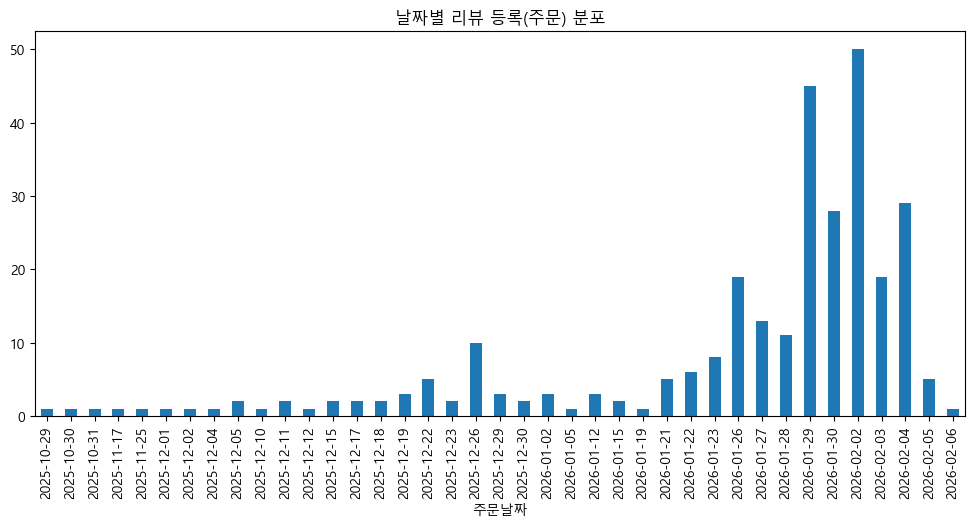

In [50]:
import matplotlib.pyplot as plt
import platform
# 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호(-) 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 날짜가 None인 데이터는 제외하고 히스토그램 그리기
df_total['주문날짜'].dropna().value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
plt.title("날짜별 리뷰 등록(주문) 분포")
plt.show()

In [52]:
df_total['포장방식'].value_counts()

포장방식
기본포장      260
고급선물포장     99
보자기포장      41
Name: count, dtype: int64

In [53]:
df_total['상품명'].value_counts()

상품명
한라명작     137
백두명작     125
천하명작      56
꽃꽃명작      52
천하특작      23
엄마네특작      7
Name: count, dtype: int64

In [54]:
df_total['별점'].value_counts()

별점
5    363
4     30
3      6
1      1
Name: count, dtype: int64

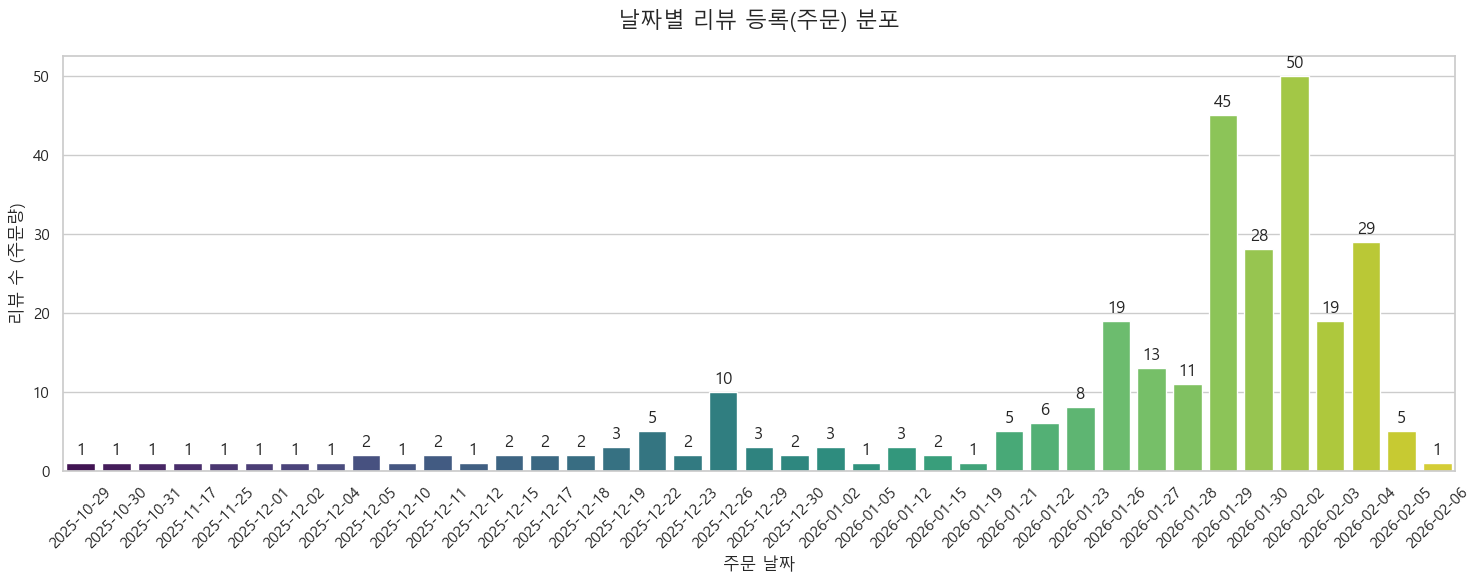

In [58]:
# 1. 데이터 준비 (날짜 데이터만 따로 추출하여 정렬)
# 에러 방지를 위해 날짜가 있는 데이터만 필터링합니다.
plot_data = df_total['주문날짜'].dropna().sort_values()

# 2. 그래프 스타일 설정
sns.set_theme(style="whitegrid", font="Malgun Gothic") # 한글 폰트 적용
plt.figure(figsize=(15, 6))

# 3. Seaborn countplot 그리기
# palette를 사용해 색상을 예쁘게 입힐 수 있습니다.
ax = sns.countplot(x=plot_data, palette="viridis")

# 4. 그래프 디테일 설정
plt.title("날짜별 리뷰 등록(주문) 분포", fontsize=16, pad=20)
plt.xlabel("주문 날짜", fontsize=12)
plt.ylabel("리뷰 수 (주문량)", fontsize=12)

# X축 날짜 글자가 겹치지 않게 회전
plt.xticks(rotation=45)

# 막대 위에 숫자 표시하기 (선택 사항)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

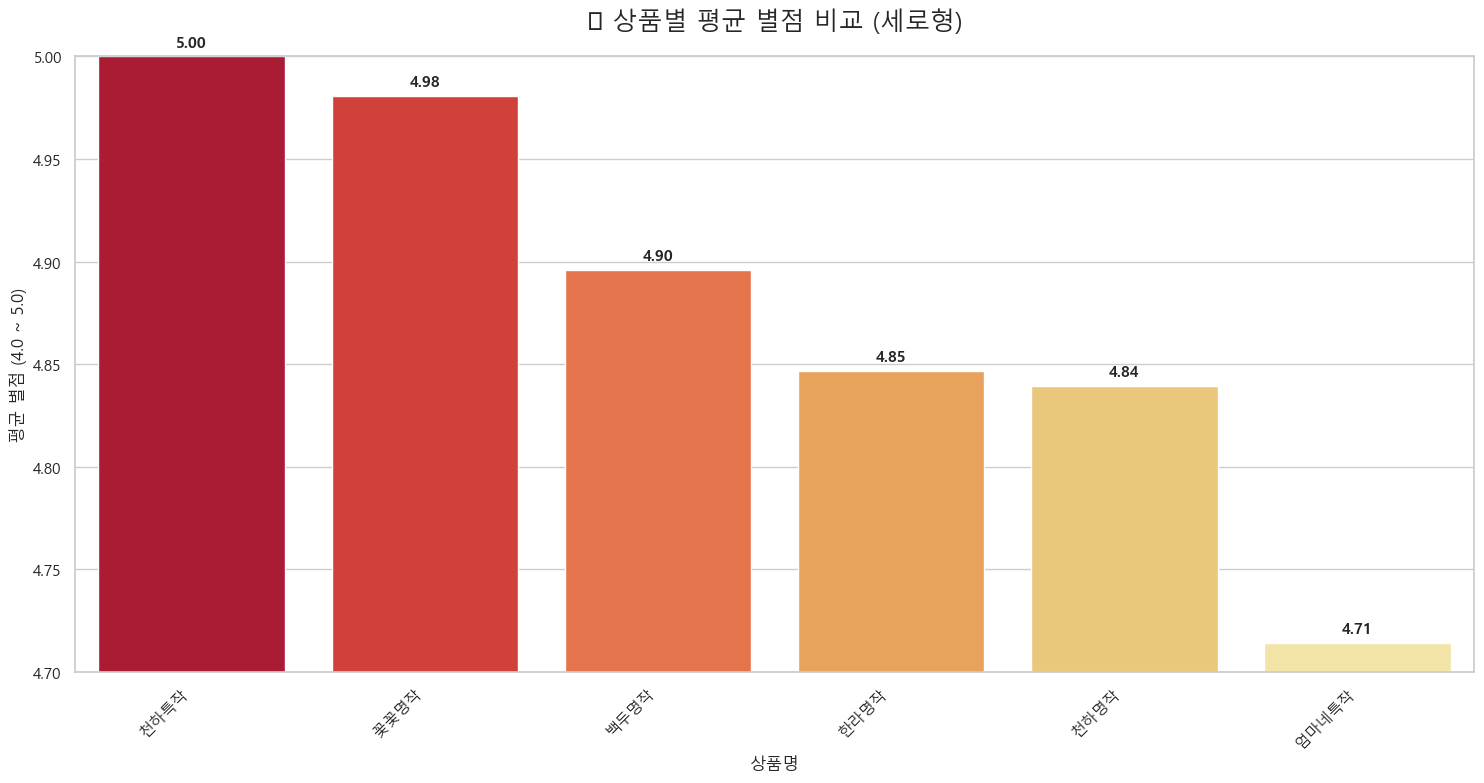

In [69]:
# 1. 상품별 통계 계산 (df_total 사용)
product_stats = df_total.groupby('상품명')['별점'].agg(['mean', 'count']).reset_index()
product_stats = product_stats.sort_values(by='mean', ascending=False) # 고득점 순 정렬

# 2. 그래프 설정
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid", font="Malgun Gothic")

# 3. 세로 막대 그래프 그리기
# x축에 상품명, y축에 평균 점수 배치
ax = sns.barplot(data=product_stats, x='상품명', y='mean', palette='YlOrRd_r')

# 4. Y축 범위 제한 (4.0 ~ 5.0)으로 차이 강조
plt.ylim(4.7, 5.0)

# 5. 막대 위에 점수 텍스트 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=11, fontweight='bold')

# 6. X축 라벨 회전 및 타이틀 설정
plt.title('⭐ 상품별 평균 별점 비교 (세로형)', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right') # 상품명이 길어 겹치지 않게 회전
plt.xlabel('상품명', fontsize=12)
plt.ylabel('평균 별점 (4.0 ~ 5.0)', fontsize=12)

plt.tight_layout()
plt.show()

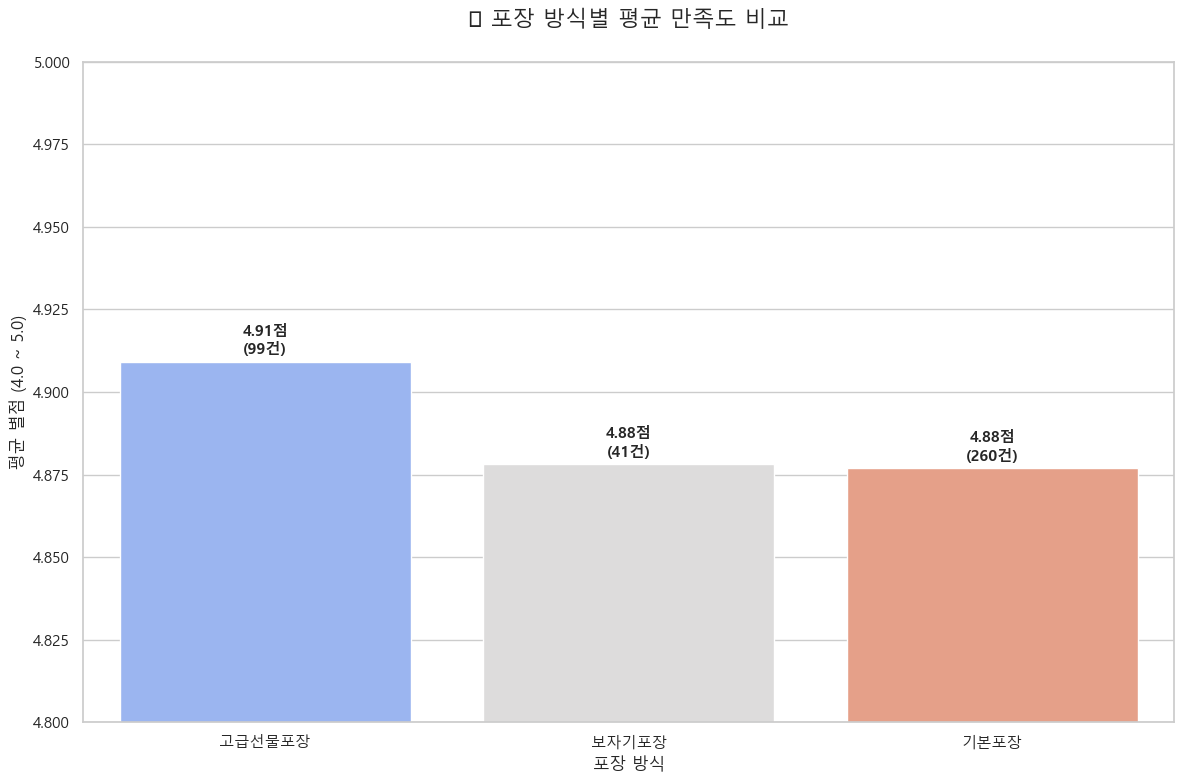

In [71]:
# 1. 포장 방식별 평균 별점과 데이터 개수 계산 (df_total 사용)
packaging_stats = df_total.groupby('포장방식')['별점'].agg(['mean', 'count']).reset_index()
packaging_stats = packaging_stats.sort_values(by='mean', ascending=False)

# 2. 그래프 스타일 설정
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid", font="Malgun Gothic")

# 3. 세로 막대 그래프 그리기
# 포장 방식에 따라 색상을 다르게 주어 시각적 재미를 더합니다.
ax = sns.barplot(data=packaging_stats, x='포장방식', y='mean', palette='coolwarm')

# 4. 차이를 명확히 하기 위해 Y축 범위 설정 (4.0 ~ 5.0)
plt.ylim(4.8, 5.0)

# 5. 막대 위에 평균 점수와 리뷰 개수 표시
for p, i in zip(ax.patches, range(len(packaging_stats))):
    score = packaging_stats.iloc[i]['mean']
    count = int(packaging_stats.iloc[i]['count'])
    ax.annotate(f'{score:.2f}점\n({count}건)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 15), 
                textcoords='offset points',
                fontsize=11, fontweight='bold')

# 6. 타이틀 및 라벨 설정
plt.title('📦 포장 방식별 평균 만족도 비교', fontsize=16, pad=25)
plt.xlabel('포장 방식', fontsize=12)
plt.ylabel('평균 별점 (4.0 ~ 5.0)', fontsize=12)

plt.tight_layout()
plt.show()